## L2D Assignment - Machine Learning 1:

This notebook contains your assignment questions for the Classification  lesson. Please attempt and complete all questions. The topics this assignment will assess are:

1. Classification


When you have completed your assignment, please commit the changes to your GitHub repository's 'Assignments' folder, as instructed in the [Assignments section](https://learntodiscover.github.io/L2D-Handbook/section7.html) of the [L2D Handbook](https://learntodiscover.github.io/L2D-Handbook).



Repeat the training and prediction workflow as described in the Classification lesson for two other features in the data, namely: Systole and Diastole values. Use 70 training and 30 testing samples where the labels are assigned according to the condition: 0 if ‘non-smoker’, 1 if ‘smoker’.


Use the code from the lesson to:

1. Train the random forest classifier.

In [9]:
# Import all the training models needed for the task 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from numpy import arange
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from itertools import product
from numpy import linspace, asarray, meshgrid

In [10]:
# Read and process the data 

data = pd.read_csv('patients_data.csv')
print(data.head())

   Age  Height  Weight  Systolic  Diastolic  Smoker  Gender
0   38      71     176       124         93       1    Male
1   43      69     163       109         77       0    Male
2   38      64     131       125         83       0  Female
3   40      67     133       117         75       0  Female
4   49      64     119       122         80       0  Female


In [11]:
# Identify the features from the data which will be in use for the task 

X = data[['Systolic','Diastolic']]
y = data['Smoker']

In [12]:
# Convert the specified data features into numpy arrays 

X = X.to_numpy()
y = (y.to_numpy()).ravel()

X.shape, y.shape

((100, 2), (100,))

In [13]:
# Use the "train_test_split" function to split the data into test and train data

RANDOM_SEED1 = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    random_state=RANDOM_SEED1)

print(X_train.shape, X_test.shape)

(70, 2) (30, 2)


In [14]:
# Train the Random Forest classifier 

clf = RandomForestClassifier(random_state=RANDOM_SEED1)

clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

2. Create state space plots with scatter plot, categorical colouring, and probability contour plot.

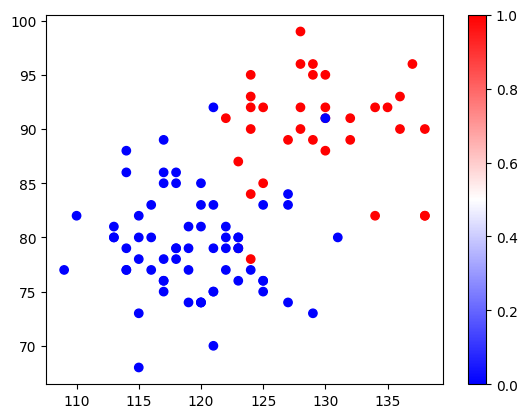

In [15]:
# Call for the creation of the grid with axis using the "subplots" function

fig, ax = subplots()

# Using the earlier identified data fill the grid with information,
# categorizing with colour for smokers and non-smokers

sc = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr');
plt.colorbar(sc)

In [16]:
# Create a mesh grid for plotting decision bounderies, based on earlier identified data

x_min, x_max = (X[:, 0].min() - 10), (X[:, 0].max() + 10)
y_min, y_max = (X[:, 1].min() - 10), (X[:, 1].max() + 10)
resolution1, resolution2 = 10, 10

dim1 = linspace(x_min, x_max, resolution1)
dim2 = linspace(y_min, y_max, resolution2)   

dim1.shape, dim2.shape

((10,), (10,))

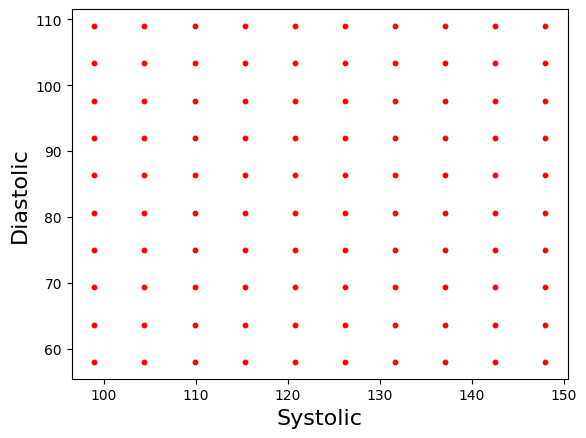

In [17]:
# Convert the earlier values form the data into an array 

coords = [coordinates for coordinates in product(dim1, dim2)]
coords = asarray(coords)

# Plot the scatter plot 

fig, ax = subplots()
ax.scatter(coords[:,0], coords[:,1], c='r', s=10);

ax.set_xlabel('Systolic', fontsize=16)
ax.set_ylabel('Diastolic', fontsize=16);

In [18]:
# Predict probabilities on the grid to create contours 

state_space_proba = clf.predict_proba(coords)
grid_shape = (resolution1, resolution2)

# Probability of class 1 (smoker)

proba_grid = state_space_proba[:, 1].reshape(grid_shape)

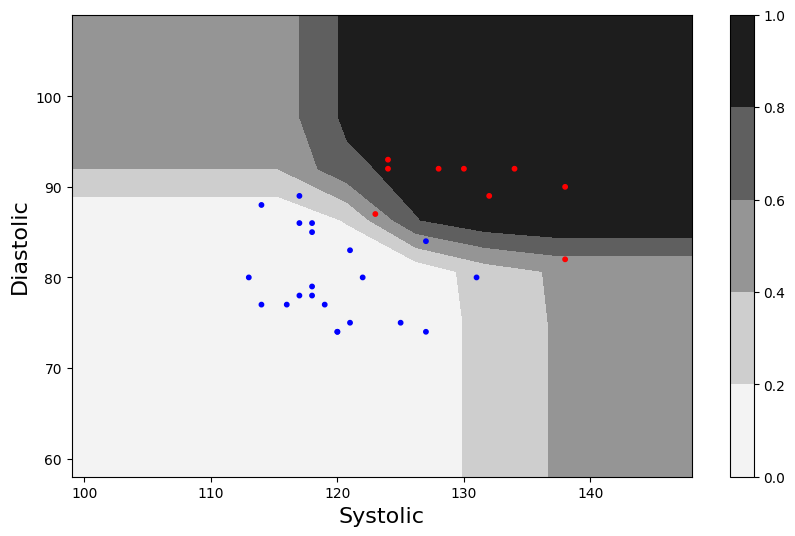

In [19]:
# Plot the grid of the probability contour plot

contour_levels = linspace(0, 1, 6)
grid_1, grid_2 = meshgrid(dim1, dim2)
fig, ax = subplots(figsize=(10, 6))

# Put labels on the newly created grid 

ax.set_xlabel('Systolic', fontsize=16)
ax.set_ylabel('Diastolic', fontsize=16);

# Plot the contour 
cax = ax.contourf(grid_1, grid_2, proba_grid, cmap='Greys', levels=contour_levels)
fig.colorbar(cax)

# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', s=10);

3. Compare the predicted and actual labels to check how well the trained model performed: how many of the 30 test data points are correctly predicted?

In [20]:
# Predict labels for the test set 

y_pred = clf.predict(X_test)

# Check that the sioze of the test set is correct 

y_pred.size

30

In [21]:
# Predict the probabilities of each class for each sample in "X_test" data set 

y_pred_prob = clf.predict_proba(X_test)

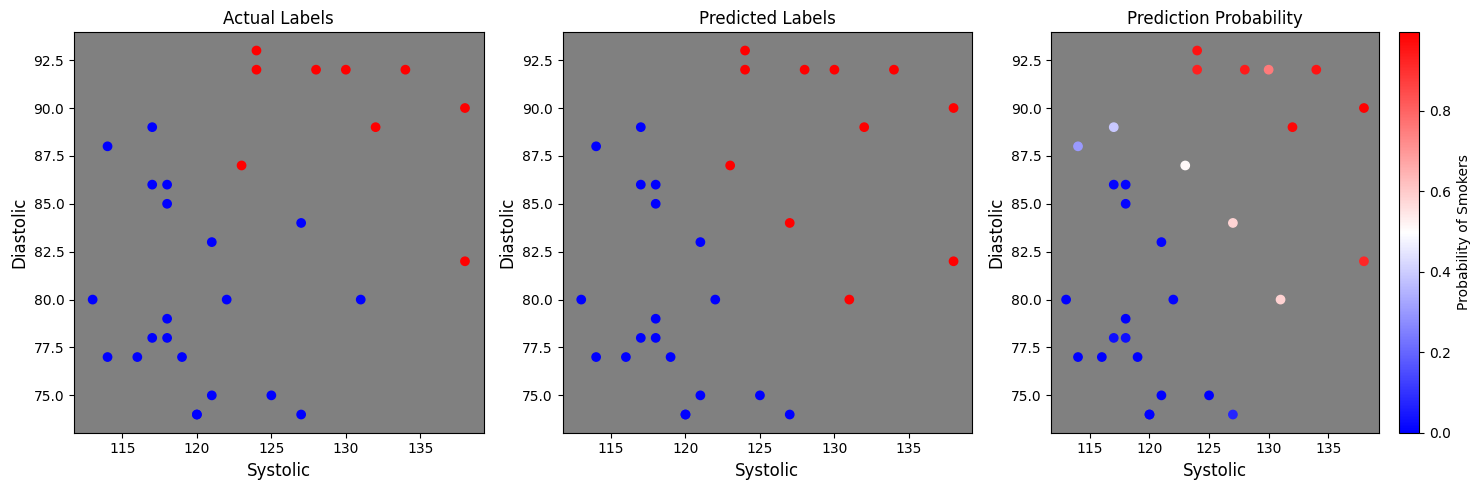

In [22]:
# Dispaly the grids for the scatter plot's visual comparison 

cols = 3
fig, ax = subplots(ncols=cols, figsize=(15,5))

# Scatter plots with categorical coloring and probability 

# Showing the actual "test" points
ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr');
ax[0].set_title("Actual Labels")
# Showing the predicted "test" points 
ax[1].scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='bwr');
ax[1].set_title("Predicted Labels")

# Showing the predicted probabilities of the "test" points 

prob_scatter = ax[2].scatter(X_test[:, 0], X_test[:, 1], c=y_pred_prob[:,1], cmap='bwr');
fig.colorbar(prob_scatter, ax=ax[2], label = "Probability of Smokers")
ax[2].set_title("Prediction Probability")

# Add display details for better visual readability 

for index in range(cols):
    ax[index].set_facecolor('gray')
    ax[index].set_xlabel('Systolic', fontsize=12)
    ax[index].set_ylabel('Diastolic', fontsize=12)

fig.tight_layout()

In [23]:
# Give the answer to the accuracy question, "How many of the 30 test data points are correctly predicted ?"

# Check if all the values in y_test is equal to corresponding values in y_pred 

prediction_accuracy = (y_pred == y_test).sum()

# Calculate accuracy as a percentage 

accuracy_percentage = (prediction_accuracy / len(y_test)) * 100

print(f"Number of correct predictions: {prediction_accuracy} out of 30")
print(f"Accuracy: {accuracy_percentage: .2f}%")

Number of correct predictions: 28 out of 30
Accuracy:  93.33%


4. Plot the feature importance to check how much the systolic and diastolic values contributed to the predictions.

In [24]:
# Retrive feature importances from the trained classifier 

feature_importances = clf.feature_importances_

feature_importances

array([0.48543327, 0.51456673])

Text(0.5, 1.0, 'Feature Importance for Systolic and Diastolic Values')

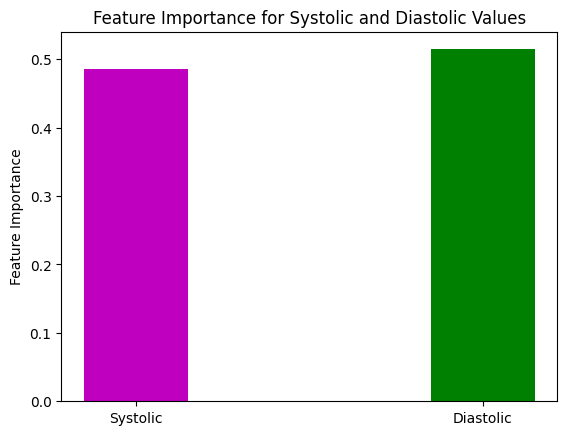

In [25]:
# Create an array for the number of features 

bins = arange(len(feature_importances))

# Set up the plot 

fig, ax = subplots()

# Plot the bar chart with labeled features 

ax.bar(bins, feature_importances, color=('m', 'g'), width=0.3);

# Label x axis with group names: "Systolic", "Diastolic"

ax.set_xticks(bins)
ax.set_xticklabels(["Systolic", "Diastolic"]);

# Labels the diagram for visual clearance 

ax.set_ylabel("Feature Importance")
ax.set_title("Feature Importance for Systolic and Diastolic Values")